**IMPORT**

In [4]:
import pandas as pd
import json       
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

**Model Evaluation Metrics**

In [20]:
#def eval_metrics(actual, pred):
    #rmse = np.sqrt(mean_squared_error(actual, pred))
    #mae = mean_absolute_error(actual, pred)
    #r2 = r2_score(actual, pred)
    #return rmse, mae, r2

**GET THE DATAFRAME**

**df 92 columns (eleminated)(dummied)**

In [5]:
df=pd.read_pickle("golden_data_reduced_16june.pkl")
X=df.drop(['price'], axis=1).values
y=df['price'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [3]:
df.shape

(14990, 92)

**df2 136 columns (not eleminated)(dummied)  to compare results with df**

In [4]:
df2=pd.read_pickle("golden_data_16_june.pkl")
X2=df2.drop(['price'], axis=1).values
y2=df['price'].values
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 0)

In [5]:
df2.shape

(14990, 136)

**df3 98 columns (not eleminated)(not dummied) for CATBOOST**

In [2]:
df3=pd.read_pickle("golden_data_not_dummied.pkl")
df3=df3.drop([14994, 14993, 14992, 14991])
X3=df3.drop(['price'], axis=1)
y3=df3['price']
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.2, random_state = 0)

In [7]:
df3.shape

(14990, 98)

**df4 76 columns (extra eleminated)(dummied)**

In [3]:
df4=pd.read_pickle("golden_data_reduced2_01aug.pkl")
X4=df4.drop(['price'], axis=1)
y4=df4['price']
from sklearn.model_selection import train_test_split
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size = 0.2, random_state = 0)

In [9]:
df4.shape

(14990, 76)

In [15]:
#We'll use df, df2, df4 for RF, XGBOOST, LGB and Deep Learning. But we'll use df3 for CATBOOST. 
#We'll use df2 and df3 to compare some of the model result which are already tested with df.

**1.RF (92 columns)**

In [6]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(n_estimators=100, random_state=10)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

In [7]:
print(rf_reg.score(X_test,y_test))

0.955957083296823


In [12]:
y_pred = rf_reg.predict(X_test)
mean_absolute_error(y_test, y_pred)

863.6365607624973

In [13]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

1491.5186450421684


**cross validation**

In [8]:
from sklearn.model_selection import cross_val_score
accuraries = cross_val_score(estimator=rf_reg, X=X_train, y=y_train, cv=10)

In [332]:
accuraries.mean()

0.9527053689703878

**RF (76 columns)**

In [19]:
rf_reg=RandomForestRegressor(n_estimators=100, random_state=10)
rf_reg.fit(X_train4, y_train4)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

In [22]:
print(rf_reg.score(X_test4,y_test4))

0.955338739078854


In [23]:
y_pred = rf_reg.predict(X_test4)
mean_absolute_error(y_test4, y_pred)

870.3528505452686

In [24]:
rmse = np.sqrt(mean_squared_error(y_test4, y_pred))
print(rmse)

1501.9523021045409


**RF with df2  (136 columns)**

In [25]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=100, random_state=10)
regressor.fit(X_train2, y_train2)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

In [26]:
y_pred = regressor.predict(X_test2)
r2_score(y_test2, y_pred)

0.9566950541099638

In [28]:
#or same calculation:
#print(regressor.score(X_test2,y_test2))

0.9566950541099638


In [29]:
mean_absolute_error(y_test2, y_pred)

858.0681262383481

In [30]:
rmse = np.sqrt(mean_squared_error(y_test2, y_pred))
print(rmse)

1478.9701231528547


**2. XG BOOST (92 columns)**

In [31]:
import xgboost
model = xgboost.XGBRegressor()
model.fit(X_train, y_train)

[10:37:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [32]:
model.score(X_test, y_test)

0.9311136902733889

In [34]:
y_pred = model.predict(X_test)
mean_absolute_error(y_test, y_pred)

1255.3685349152038

In [35]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

1865.3361664399752


**XG BOOST with df2 (136 columns)**

In [36]:
import xgboost
model = xgboost.XGBRegressor()
model.fit(X_train2, y_train2)

[10:38:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [37]:
model.score(X_test2, y_test2)

0.9340952852755392

In [38]:
y_pred = model.predict(X_test2)
mean_absolute_error(y_test2, y_pred)

1217.1136413533502

In [39]:
rmse = np.sqrt(mean_squared_error(y_test2, y_pred))
print(rmse)

1824.5211115380748


**3. CATBOOST (98 columns)**

In [3]:
from catboost import CatBoostRegressor
categorical_features_indices = np.where(X3.dtypes == np.object)[0]
clf = CatBoostRegressor()
clf.fit(X_train3, y_train3, cat_features=categorical_features_indices)

0:	learn: 18634.7811834	total: 97.7ms	remaining: 1m 37s
1:	learn: 18111.9498658	total: 149ms	remaining: 1m 14s
2:	learn: 17616.8686735	total: 182ms	remaining: 1m
3:	learn: 17127.6903164	total: 234ms	remaining: 58.4s
4:	learn: 16656.3167317	total: 284ms	remaining: 56.5s
5:	learn: 16221.6763552	total: 308ms	remaining: 51s
6:	learn: 15767.1649597	total: 366ms	remaining: 51.9s
7:	learn: 15331.9557200	total: 428ms	remaining: 53s
8:	learn: 14909.7951805	total: 476ms	remaining: 52.4s
9:	learn: 14503.5415030	total: 530ms	remaining: 52.5s
10:	learn: 14115.6893598	total: 591ms	remaining: 53.2s
11:	learn: 13743.1466641	total: 643ms	remaining: 52.9s
12:	learn: 13374.2275895	total: 693ms	remaining: 52.6s
13:	learn: 13014.7150426	total: 738ms	remaining: 52s
14:	learn: 12658.0093017	total: 793ms	remaining: 52s
15:	learn: 12315.4997199	total: 834ms	remaining: 51.3s
16:	learn: 11981.4851879	total: 871ms	remaining: 50.4s
17:	learn: 11663.5377056	total: 919ms	remaining: 50.1s
18:	learn: 11361.2672180	tot

In [44]:
from sklearn.metrics import r2_score
y_pred = clf.predict(X_test3)
r2_score(y_test3, y_pred)

0.909137197009115

In [45]:
mean_absolute_error(y_test3, y_pred)

1326.2347190175954

In [46]:
rmse = np.sqrt(mean_squared_error(y_test3, y_pred))
print(rmse)

2142.3169095526673


**4.LGBM (92 columns)**

In [47]:
import lightgbm

In [48]:
train_data = lightgbm.Dataset(X_train, label=y_train)
test_data = lightgbm.Dataset(X_test, label=y_test)

In [49]:
params={'metric' : 'l1'}

In [50]:
model_lgbm = lightgbm.train(params,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)

[1]	valid_0's l1: 4951.81
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l1: 4532.63
[3]	valid_0's l1: 4162.72
[4]	valid_0's l1: 3832.91
[5]	valid_0's l1: 3535.66
[6]	valid_0's l1: 3263.6
[7]	valid_0's l1: 3029.22
[8]	valid_0's l1: 2817.16
[9]	valid_0's l1: 2637.58
[10]	valid_0's l1: 2464.68
[11]	valid_0's l1: 2319.1
[12]	valid_0's l1: 2183.45
[13]	valid_0's l1: 2061.8
[14]	valid_0's l1: 1954.3
[15]	valid_0's l1: 1862.97
[16]	valid_0's l1: 1776.28
[17]	valid_0's l1: 1700.64
[18]	valid_0's l1: 1632.97
[19]	valid_0's l1: 1573.65
[20]	valid_0's l1: 1521.53
[21]	valid_0's l1: 1472.81
[22]	valid_0's l1: 1431.28
[23]	valid_0's l1: 1392.43
[24]	valid_0's l1: 1360.92
[25]	valid_0's l1: 1334.64
[26]	valid_0's l1: 1307.82
[27]	valid_0's l1: 1286.26
[28]	valid_0's l1: 1265.63
[29]	valid_0's l1: 1250.17
[30]	valid_0's l1: 1235.16
[31]	valid_0's l1: 1222.16
[32]	valid_0's l1: 1208.95
[33]	valid_0's l1: 1198.22
[34]	valid_0's l1: 1184.19
[35]	valid_0's l1: 1174.44
[36]	

In [51]:
y_pred = model_lgbm.predict(X_test)
r2_score(y_test, y_pred)

0.9569139718006007

In [52]:
mean_absolute_error(y_test, y_pred)

866.5634219366598

In [53]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

1475.2270986152487


**LGBM with df2 (136 columns)**

In [54]:
train_data = lightgbm.Dataset(X_train2, label=y_train2)
test_data = lightgbm.Dataset(X_test2, label=y_test2)

In [55]:
params={'metric' : 'l1'}

In [56]:
model_lgbm = lightgbm.train(params,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)

[1]	valid_0's l1: 4942.99
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l1: 4517.41
[3]	valid_0's l1: 4144.13
[4]	valid_0's l1: 3807.63
[5]	valid_0's l1: 3497.32
[6]	valid_0's l1: 3227.51
[7]	valid_0's l1: 2988.66
[8]	valid_0's l1: 2779.72
[9]	valid_0's l1: 2595.55
[10]	valid_0's l1: 2431.02
[11]	valid_0's l1: 2284.75
[12]	valid_0's l1: 2143.81
[13]	valid_0's l1: 2026
[14]	valid_0's l1: 1924.74
[15]	valid_0's l1: 1833.87
[16]	valid_0's l1: 1744.12
[17]	valid_0's l1: 1674.73
[18]	valid_0's l1: 1607.31
[19]	valid_0's l1: 1551.09
[20]	valid_0's l1: 1498.13
[21]	valid_0's l1: 1449.86
[22]	valid_0's l1: 1409.46
[23]	valid_0's l1: 1370.91
[24]	valid_0's l1: 1337.35
[25]	valid_0's l1: 1309.74
[26]	valid_0's l1: 1282.99
[27]	valid_0's l1: 1259.88
[28]	valid_0's l1: 1238.23
[29]	valid_0's l1: 1221.71
[30]	valid_0's l1: 1204.94
[31]	valid_0's l1: 1190.34
[32]	valid_0's l1: 1180.24
[33]	valid_0's l1: 1167.88
[34]	valid_0's l1: 1157.92
[35]	valid_0's l1: 1148.63
[36]

In [57]:
from sklearn.metrics import r2_score
y_pred = model_lgbm.predict(X_test2)
r2_score(y_test2, y_pred)

0.9606005733295175

In [58]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test2, y_pred)

837.2647520901652

In [59]:
rmse = np.sqrt(mean_squared_error(y_test2, y_pred))
print(rmse)

1410.7030385454402


**LGBM with df4 (76 columns)**

In [60]:
train_data = lightgbm.Dataset(X_train4, label=y_train4)
test_data = lightgbm.Dataset(X_test4, label=y_test4)

In [61]:
params={'metric' : 'l1'}

In [62]:
model_lgbm = lightgbm.train(params,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)

[1]	valid_0's l1: 4951.81
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l1: 4532.63
[3]	valid_0's l1: 4162.72
[4]	valid_0's l1: 3832.91
[5]	valid_0's l1: 3535.66
[6]	valid_0's l1: 3263.6
[7]	valid_0's l1: 3029.22
[8]	valid_0's l1: 2817.16
[9]	valid_0's l1: 2637.58
[10]	valid_0's l1: 2464.68
[11]	valid_0's l1: 2317.11
[12]	valid_0's l1: 2183.68
[13]	valid_0's l1: 2063.08
[14]	valid_0's l1: 1959.97
[15]	valid_0's l1: 1862.4
[16]	valid_0's l1: 1779.63
[17]	valid_0's l1: 1698.29
[18]	valid_0's l1: 1632.86
[19]	valid_0's l1: 1575.67
[20]	valid_0's l1: 1519.96
[21]	valid_0's l1: 1475.82
[22]	valid_0's l1: 1433.84
[23]	valid_0's l1: 1397.88
[24]	valid_0's l1: 1364.95
[25]	valid_0's l1: 1336.48
[26]	valid_0's l1: 1311.45
[27]	valid_0's l1: 1290.39
[28]	valid_0's l1: 1269.9
[29]	valid_0's l1: 1251.17
[30]	valid_0's l1: 1236.84
[31]	valid_0's l1: 1222.08
[32]	valid_0's l1: 1206.71
[33]	valid_0's l1: 1195.49
[34]	valid_0's l1: 1184.06
[35]	valid_0's l1: 1174.85
[36]

In [63]:
from sklearn.metrics import r2_score
y_pred = model_lgbm.predict(X_test4)
r2_score(y_test4, y_pred)

0.9551879864292614

In [64]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test4, y_pred)

892.9101351264428

In [65]:
rmse = np.sqrt(mean_squared_error(y_test4, y_pred))
print(rmse)

1504.4850624331118


**5.DEEP LEARNING ANN (92 columns)**

In [9]:
import keras 
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [11]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(46, kernel_initializer='normal',input_dim = X_train_sc.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(46, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(46, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(optimizer = 'adam', loss = 'mean_absolute_error')
NN_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 46)                4232      
_________________________________________________________________
dense_2 (Dense)              (None, 46)                2162      
_________________________________________________________________
dense_3 (Dense)              (None, 46)                2162      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 47        
Total params: 8,603
Trainable params: 8,603
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=NN_model.fit(X_train_sc, y_train, epochs=100, batch_size=32, validation_split = 0.2)

Instructions for updating:
Use tf.cast instead.
Train on 9593 samples, validate on 2399 samples
Epoch 1/100
9593/9593 [==============================] - 1s 105us/step - loss: 13671.6197 - val_loss: 6735.2421
Epoch 2/100
9593/9593 [==============================] - 0s 50us/step - loss: 5106.4288 - val_loss: 4246.4889
Epoch 3/100
9593/9593 [==============================] - 0s 49us/step - loss: 3518.5549 - val_loss: 2980.4570
Epoch 4/100
9593/9593 [==============================] - 0s 49us/step - loss: 2584.3146 - val_loss: 2349.0583
Epoch 5/100
9593/9593 [==============================] - 0s 52us/step - loss: 2110.0873 - val_loss: 1996.5644
Epoch 6/100
9593/9593 [==============================] - 1s 54us/step - loss: 1827.3826 - val_loss: 1802.7052
Epoch 7/100
9593/9593 [==============================] - 0s 51us/step - loss: 1652.4861 - val_loss: 1657.7916
Epoch 8/100
9593/9593 [==============================] - 0s 50us/step - loss: 1532.2933 - val_loss: 1563.7037
Epoch 9/100
9593/9593 

In [70]:
y_pred = NN_model.predict(X_test_sc)
r2_score(y_test, y_pred)

0.9381706255445302

In [71]:
mean_absolute_error(y_test, y_pred)

1076.8400355282429

In [72]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

1767.2096608340414


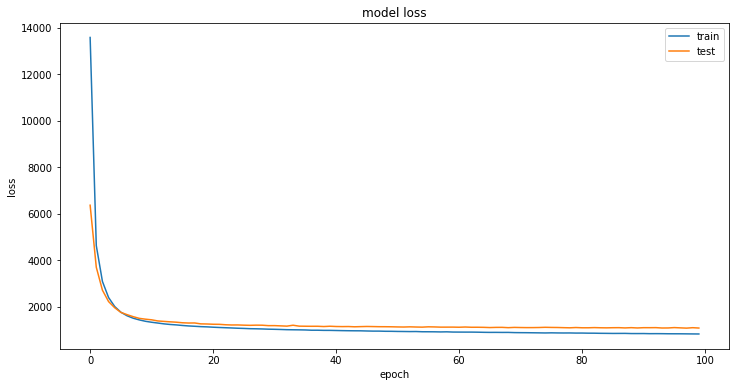

In [73]:
# summarize history for loss   
plt.figure(figsize=(12,6))    
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper right')  
plt.show()  

In [74]:
print(history.history.keys())

dict_keys(['val_loss', 'loss'])


**DEEP LEARNING WITH df2 (136 columns)**

In [75]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc2 = sc.fit_transform(X_train2)
X_test_sc2 = sc.transform(X_test2)

In [76]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(46, kernel_initializer='normal',input_dim = X_train_sc2.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(46, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(46, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(optimizer = 'adam', loss = 'mean_absolute_error')
NN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 46)                6256      
_________________________________________________________________
dense_6 (Dense)              (None, 46)                2162      
_________________________________________________________________
dense_7 (Dense)              (None, 46)                2162      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 47        
Total params: 10,627
Trainable params: 10,627
Non-trainable params: 0
_________________________________________________________________


In [77]:
history=NN_model.fit(X_train_sc2, y_train2, epochs=100, batch_size=32, validation_split = 0.2)

Train on 9593 samples, validate on 2399 samples
Epoch 1/100
9593/9593 [==============================] - 2s 248us/step - loss: 13180.3998 - val_loss: 5785.3021
Epoch 2/100
9593/9593 [==============================] - 1s 117us/step - loss: 4441.8901 - val_loss: 3717.2286
Epoch 3/100
9593/9593 [==============================] - 1s 117us/step - loss: 3071.1313 - val_loss: 2745.9730
Epoch 4/100
9593/9593 [==============================] - 1s 119us/step - loss: 2375.4143 - val_loss: 2247.5465
Epoch 5/100
9593/9593 [==============================] - 1s 110us/step - loss: 1993.4308 - val_loss: 1953.2035
Epoch 6/100
9593/9593 [==============================] - 1s 114us/step - loss: 1758.5400 - val_loss: 1788.3494
Epoch 7/100
9593/9593 [==============================] - 1s 109us/step - loss: 1611.4748 - val_loss: 1679.3093
Epoch 8/100
9593/9593 [==============================] - 1s 111us/step - loss: 1501.2056 - val_loss: 1574.4171
Epoch 9/100
9593/9593 [==============================] - 1s 110

In [78]:
y_pred = NN_model.predict(X_test_sc2)
r2_score(y_test2, y_pred)

0.9384581094167794

In [79]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test2, y_pred)

1072.6579210358989

In [80]:
rmse = np.sqrt(mean_squared_error(y_test2, y_pred))
print(rmse)

1763.0964362333714


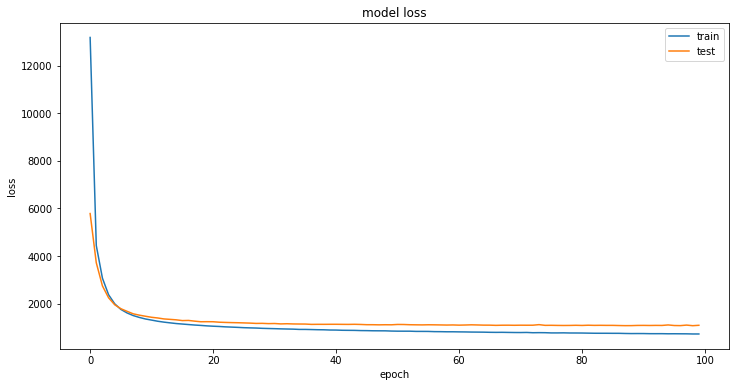

In [81]:
# summarize history for loss   
plt.figure(figsize=(12,6))    
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper right')  
plt.show()  

**FEATURE EXTRACTION (PCA&LDA)**

**PCA Initial**

In [196]:
df=pd.read_pickle("golden_data_16_june.pkl")
X=df.drop(['price'], axis=1).values
y=df['price'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [197]:
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [198]:
explained_variance

array([9.99951179e-01, 4.85029645e-05, 3.06295359e-07, 1.41924330e-09,
       8.86024569e-10, 5.03565003e-10, 4.50983562e-10, 3.85913796e-10,
       3.62064584e-10, 3.16081744e-10, 2.94516905e-10, 2.37293860e-10,
       2.21581705e-10, 2.09811061e-10, 1.96271299e-10, 1.82029857e-10,
       1.78545108e-10, 1.74142956e-10, 1.63510978e-10, 1.56458169e-10,
       1.54288076e-10, 1.49050637e-10, 1.41385433e-10, 1.39329399e-10,
       1.34200254e-10, 1.25185177e-10, 1.16148625e-10, 1.14451473e-10,
       1.14176660e-10, 1.09293757e-10, 1.08973974e-10, 1.04925654e-10,
       1.03787547e-10, 9.84527265e-11, 9.66298029e-11, 9.37238821e-11,
       9.20295604e-11, 8.86247054e-11, 8.84645025e-11, 8.65583580e-11,
       8.50607022e-11, 8.06167718e-11, 7.97646384e-11, 7.88710942e-11,
       7.70498004e-11, 7.57065800e-11, 7.31037898e-11, 7.21348974e-11,
       6.97013074e-11, 6.94148830e-11, 6.78417967e-11, 6.64403069e-11,
       6.48808936e-11, 6.29937404e-11, 6.23434550e-11, 6.03807434e-11,
      

**PCA from 136 to 2 columns**

In [127]:
df=pd.read_pickle("golden_data_16_june.pkl")
X=df.drop(['price'], axis=1).values
y=df['price'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [128]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [129]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(n_estimators=100, random_state=10)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

In [130]:
y_pred = rf_reg.predict(X_test)
r2_score(y_test, y_pred)

0.7690638765686454

In [136]:
y_pred = rf_reg.predict(X_test)
mean_absolute_error(y_test, y_pred)

2189.5585146258354

In [137]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

3415.360775650376


**PCA from 136 to 4 columns**

In [138]:
df=pd.read_pickle("golden_data_16_june.pkl")
X=df.drop(['price'], axis=1).values
y=df['price'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [139]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [140]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(n_estimators=100, random_state=10)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

In [141]:
y_pred = rf_reg.predict(X_test)
r2_score(y_test, y_pred)

0.8684698068862658

In [142]:
y_pred = rf_reg.predict(X_test)
mean_absolute_error(y_test, y_pred)

1619.0763760638451

In [143]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

2577.5279276623664


**PCA from 136 to 6 columns**

In [145]:
df=pd.read_pickle("golden_data_16_june.pkl")
X=df.drop(['price'], axis=1).values
y=df['price'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [146]:
from sklearn.decomposition import PCA
pca=PCA(n_components=6)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [147]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(n_estimators=100, random_state=10)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

In [148]:
y_pred = rf_reg.predict(X_test)
r2_score(y_test, y_pred)

0.8999772473709668

In [149]:
y_pred = rf_reg.predict(X_test)
mean_absolute_error(y_test, y_pred)

1391.5078013223053

In [150]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

2247.7088305792827


**PCA from 136 to 20 columns**

In [151]:
df=pd.read_pickle("golden_data_16_june.pkl")
X=df.drop(['price'], axis=1).values
y=df['price'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [152]:
from sklearn.decomposition import PCA
pca=PCA(n_components=20)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [153]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(n_estimators=100, random_state=10)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

In [154]:
y_pred = rf_reg.predict(X_test)
r2_score(y_test, y_pred)

0.9289697051992721

In [155]:
y_pred = rf_reg.predict(X_test)
mean_absolute_error(y_test, y_pred)

1143.4481790334928

In [156]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

1894.141673848776


**LDA from 136 to 2 columns**

In [158]:
df=pd.read_pickle("golden_data_16_june.pkl")
X=df.drop(['price'], axis=1).values
y=df['price'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [159]:
#Applying LDA (compared to PCA y_train is also included
#because LDA is a supervised algorithm)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [160]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(n_estimators=100, random_state=10)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

In [161]:
y_pred = rf_reg.predict(X_test)
r2_score(y_test, y_pred)

0.8991329017036354

In [162]:
y_pred = rf_reg.predict(X_test)
mean_absolute_error(y_test, y_pred)

1342.3507701236956

In [163]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

2257.175950814695


**LDA from 136 to 4 columns**

In [204]:
df=pd.read_pickle("golden_data_16_june.pkl")
X=df.drop(['price'], axis=1).values
y=df['price'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [205]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 4)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [206]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(n_estimators=100, random_state=10)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

In [207]:
y_pred = rf_reg.predict(X_test)
r2_score(y_test, y_pred)

0.9214344574164797

In [208]:
y_pred = rf_reg.predict(X_test)
mean_absolute_error(y_test, y_pred)

1164.2880724944023

In [210]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

1992.0796903850571
